In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data=pd.read_csv('/content/drive/MyDrive/Churn_Modelling.csv')
data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [2]:
data.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
data.shape

(10000, 14)

In [4]:
data.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [5]:
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [6]:
data.info

<bound method DataFrame.info of       RowNumber  CustomerId    Surname  CreditScore Geography  Gender  Age  \
0             1    15634602   Hargrave          619    France  Female   42   
1             2    15647311       Hill          608     Spain  Female   41   
2             3    15619304       Onio          502    France  Female   42   
3             4    15701354       Boni          699    France  Female   39   
4             5    15737888   Mitchell          850     Spain  Female   43   
...         ...         ...        ...          ...       ...     ...  ...   
9995       9996    15606229   Obijiaku          771    France    Male   39   
9996       9997    15569892  Johnstone          516    France    Male   35   
9997       9998    15584532        Liu          709    France  Female   36   
9998       9999    15682355  Sabbatini          772   Germany    Male   42   
9999      10000    15628319     Walker          792    France  Female   28   

      Tenure    Balance  NumOfP

In [7]:
data.drop(['RowNumber','CustomerId','Surname'],axis=1,inplace=True)

In [8]:
data

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [9]:
data['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [10]:
data['Exited'].unique()

array([1, 0])

In [11]:
data['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [12]:
from sklearn.preprocessing import LabelEncoder
lr=LabelEncoder()
data['Geography']=lr.fit_transform(data['Geography'])
data['Gender']=lr.fit_transform(data['Gender'])
data.dtypes


CreditScore          int64
Geography            int64
Gender               int64
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [13]:
x=data.drop('Exited',axis=1)
y=data['Exited']


In [14]:
x

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,0,0,42,2,0.00,1,1,1,101348.88
1,608,2,0,41,1,83807.86,1,0,1,112542.58
2,502,0,0,42,8,159660.80,3,1,0,113931.57
3,699,0,0,39,1,0.00,2,0,0,93826.63
4,850,2,0,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...
9995,771,0,1,39,5,0.00,2,1,0,96270.64
9996,516,0,1,35,10,57369.61,1,1,1,101699.77
9997,709,0,0,36,7,0.00,1,0,1,42085.58
9998,772,1,1,42,3,75075.31,2,1,0,92888.52


In [15]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [16]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=1,test_size=0.2)

In [17]:
x_train.shape[1]

10

In [18]:
x_train.shape[0]

8000

In [19]:
from sklearn.metrics import r2_score
from sklearn.linear_model import LogisticRegression
lo=LogisticRegression()
lo.fit(x_train,y_train)
y_pred_lo=lo.predict(x_test)
r2_score(y_test,y_pred_lo)

-0.3043974003268597

In [20]:
from tensorflow.keras.layers import Flatten,Dense
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import Sequential

In [21]:
model=Sequential()

In [22]:
model.add(Flatten(input_shape=(x_train.shape[1],)))
model.add(Dense(units=1000,activation="relu"))
model.add(Dense(units=1,activation='sigmoid'))

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 10)                0         
                                                                 
 dense (Dense)               (None, 1000)              11000     
                                                                 
 dense_1 (Dense)             (None, 1)                 1001      
                                                                 
Total params: 12001 (46.88 KB)
Trainable params: 12001 (46.88 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [24]:
model.compile(optimizer='adam',loss='BinaryCrossentropy',metrics=['accuracy'])

In [25]:
e=model.fit(x_train,y_train,epochs=20,batch_size=10,validation_data=(x_test,y_test))

Epoch 1/20
800/800 [==============================] - 8s 6ms/step - loss: 450.7680 - accuracy: 0.6781 - val_loss: 384.5147 - val_accuracy: 0.7925
Epoch 2/20
800/800 [==============================] - 5s 6ms/step - loss: 278.6416 - accuracy: 0.6834 - val_loss: 621.0551 - val_accuracy: 0.7920
Epoch 3/20
800/800 [==============================] - 7s 9ms/step - loss: 192.9228 - accuracy: 0.6875 - val_loss: 123.2366 - val_accuracy: 0.6190
Epoch 4/20
800/800 [==============================] - 4s 5ms/step - loss: 180.9947 - accuracy: 0.6908 - val_loss: 68.9687 - val_accuracy: 0.6065
Epoch 5/20
800/800 [==============================] - 3s 3ms/step - loss: 136.6222 - accuracy: 0.6855 - val_loss: 102.9945 - val_accuracy: 0.2250
Epoch 6/20
800/800 [==============================] - 3s 3ms/step - loss: 83.6071 - accuracy: 0.6925 - val_loss: 72.0089 - val_accuracy: 0.7525
Epoch 7/20
800/800 [==============================] - 3s 3ms/step - loss: 100.1988 - accuracy: 0.6846 - val_loss: 114.6387 - va

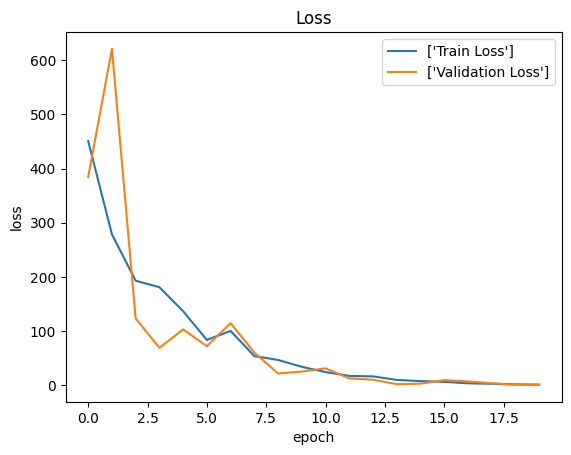

In [26]:
from matplotlib import pyplot as plt
train_acc=e.history['accuracy']
val_acc=e.history['val_accuracy']
epoch=e.epoch
train_l=e.history['loss']
val_l=e.history['val_loss']
plt.plot(epoch,train_l,label=['Train Loss'])
plt.plot(epoch,val_l,label=['Validation Loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title("Loss")
plt.legend()


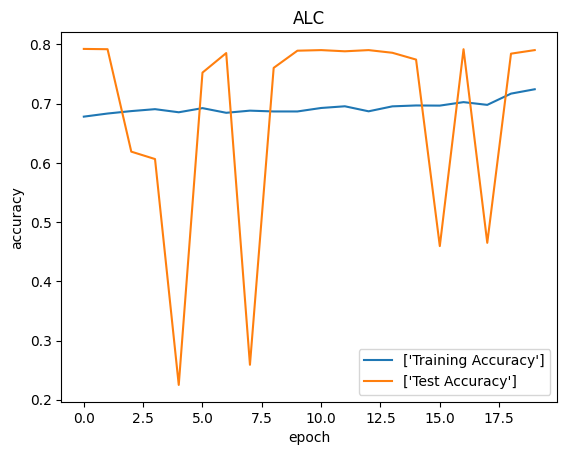

In [27]:
plt.plot(epoch,train_acc,label=['Training Accuracy'])
plt.plot(epoch,val_acc,label=['Test Accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('ALC')
plt.legend()
